<a href="https://colab.research.google.com/github/Alexlev29081997/2019/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

from IPython.display import IFrame

In [0]:
# We import dblp from google drive
id='1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dblp.tsv.bz2')  
dblp = pd.read_csv('data/dblp.tsv.bz2', sep="\t")

In [0]:
# # pip install googledrivedownloader

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6',
                                     dest_path='data/dblp.tsv.bz2',
                                     unzip=False)

In [0]:
# We can also import directly from the computer
dblp = pd.read_csv("data/dblp.tsv.bz2", sep='\t')

KeyboardInterrupt: ignored

In [0]:
dblp.head()

,id,authors,year,title
0,tr/meltdown/s18,"['Paul Kocher', 'Daniel Genkin', 'Daniel Gruss...",2018.0,Spectre Attacks: Exploiting Speculative Execut...
1,tr/meltdown/m18,"['Moritz Lipp', 'Michael Schwarz 0001', 'Danie...",2018.0,Meltdown
2,tr/acm/CS2013,[],2013.0,Computer Science Curricula 2013
3,tr/gte/TR-0263-08-94-165,['Frank Manola'],1994.0,An Evaluation of Object-Oriented DBMS Developm...
4,tr/gte/TR-0222-10-92-165,"['Michael L. Brodie', 'Michael Stonebraker']",1993.0,DARWIN: On the Incremental Migration of Legacy...


In [0]:
dblp.columns = ['paper id', 'paper authors', 'paper year', 'paper title']

In [0]:
dblp['paper year'].replace(['\?','\<.{1,3}\>'], '', regex = True, inplace=True)

def complete_date(x):       
    if len(x) > 0 and x[0] == "'":
        x = int(x[1:])
        if x > 20:
            return str(1900 + x)
        else:
            return str(2000 + x)

    else:
        return x.split(".")[0]
    
dblp['paper year'] = dblp['paper year'].apply(lambda x: complete_date(x))

In [0]:
# dblp['paper year'] = pd.to_numeric(dblp['paper year']).fillna(0).astype(int)
# dblp = dblp[dblp['paper year']!=0]
# dblp = dblp[dblp['paper authors']!="[]"]

In [0]:
conf_file = open('data/list_of_ai_conferences.txt', 'r')
conf_list = [line.replace('\n','') for line in conf_file.readlines()]

In [0]:
dblp_papers = dblp[dblp['paper id'].str.contains('conf/')]

In [0]:
dblp_papers['conference'] = dblp_papers['paper id'].apply(lambda x:x.split('/')[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
dblp_papers = dblp_papers[dblp_papers['conference'].isin(conf_list)]
dblp_papers.head()

,paper id,paper authors,paper year,paper title,conference
2049312,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990,Object recognition using a feature search stra...,iccv
2049313,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999,Three-Dimensional Scene Flow.,iccv
2049314,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
2049315,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990,Qualitative 3-D shape reconstruction using dis...,iccv
2049316,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


In [0]:
print(F'all \t {dblp_papers.shape[0]}')
dblp_papers['conference'].value_counts()

all 	 102003


icra      21585
cvpr      12853
aaai      10796
ijcai      9669
nips       8445
acl        6330
icml       5017
iconip     4985
iccv       4179
naacl      3310
emnlp      3299
icann      3134
accv       2390
fgr        1383
pricai     1372
iccbr       863
ida         712
ilp         679
ksem        635
aamas       367
Name: conference, dtype: int64

### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [0]:
# Credits. https://gist.github.com/jlln/338b4b0b55bd6984f883\n",
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row.
    The values in the other columns are duplicated across the newly divided rows.'''
    
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
            
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [0]:
dblp_authors = splitDataFrameList(dblp_papers,'paper authors',',')

In [0]:
dblp_authors['paper authors'].replace(["\[","\'","\]"],"",inplace=True,regex=True)
dblp_authors = dblp_authors[dblp_authors['paper authors'] != ""]
dblp_authors.head()

,conference,paper authors,paper id,paper title,paper year
0,iccv,Yoshinori Kuno,conf/iccv/KunoOO90,Object recognition using a feature search stra...,1990
1,iccv,Yasukazu Okamoto,conf/iccv/KunoOO90,Object recognition using a feature search stra...,1990
2,iccv,Satoshi Okada,conf/iccv/KunoOO90,Object recognition using a feature search stra...,1990
3,iccv,Sundar Vedula,conf/iccv/VedulaBRCK99,Three-Dimensional Scene Flow.,1999
4,iccv,Simon Baker,conf/iccv/VedulaBRCK99,Three-Dimensional Scene Flow.,1999


In [0]:
print(F"there is {dblp_authors['paper authors'].unique().shape[0]} unique authors")

there is 129558 unique authors


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

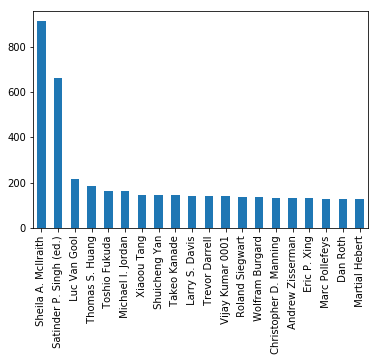

In [0]:
#plot the 20th authors with the most of publications

dblp_authors['paper authors'].value_counts()[:20].plot(kind='bar')
plt.show()


We see that the 2 most represented authors have more than the double of papers than the third. This is strange...

In [0]:
# conference level
dblp_authors[dblp_authors['paper authors'].str.contains('Sheila A. McIlraith')]['conference'].value_counts()

aaai     904
ijcai     13
icml       1
Name: conference, dtype: int64

In [0]:
# year level
dblp_authors[dblp_authors['paper authors'].str.contains('Sheila A. McIlraith')]['paper year'].value_counts()

2018    893
2017      4
2016      4
2013      2
2014      2
2007      2
2011      2
2010      1
2000      1
2001      1
2015      1
2009      1
2003      1
1997      1
2006      1
2008      1
Name: paper year, dtype: int64

In [0]:
IFrame('https://www.cs.toronto.edu/~sheila/', width=800, height=600)

In [0]:
# conference level
dblp_authors[dblp_authors['paper authors'].str.contains('Satinder P. Singh')]['conference'].value_counts()

aaai     682
nips      32
icml      20
ijcai     11
aamas      3
Name: conference, dtype: int64

In [0]:
# year level
dblp_authors[dblp_authors['paper authors'].str.contains('Satinder P. Singh')]['paper year'].value_counts()

2017    666
1998      7
2016      6
2005      5
2012      5
2006      5
2007      4
2000      4
2004      4
1994      4
2014      3
1991      3
2003      3
2015      3
2001      3
1996      3
2009      2
1993      2
2011      2
1999      2
2018      2
1992      2
2008      2
2013      1
1997      1
2002      1
1995      1
2010      1
          1
Name: paper year, dtype: int64

In [0]:
IFrame('https://mcircc.umich.edu/satinder-singh-phd', width=800, height=600)

Both authors are fellows of the AAAI and they have an oddly big number of publication in this 'conference'. We are going to remove this conference from the data frame, in order to remove the outliers.

In [0]:
dblp_authors = dblp_authors[dblp_authors['conference'] != "aaai"]

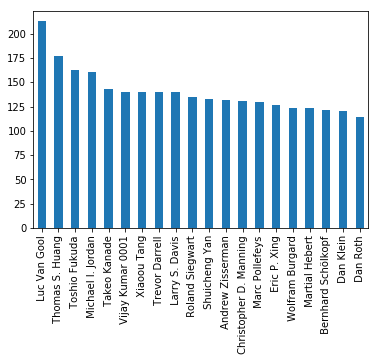

In [0]:
dblp_authors['paper authors'].value_counts()[:20].plot(kind='bar')
plt.show()

***A3.2***

Cleaning has been made in the first part. Inconsistencies that occured are the following :
- not always the same format (complete date, e.g 2014 versus uncomplete date, e.g. '95). We complete the uncomplete date adding 19 for date after 1920 and 20 for date before 2020. As an example, '89 gives 1989 whereas '17 gives 2017.
- missing dates. We just dropped these data.

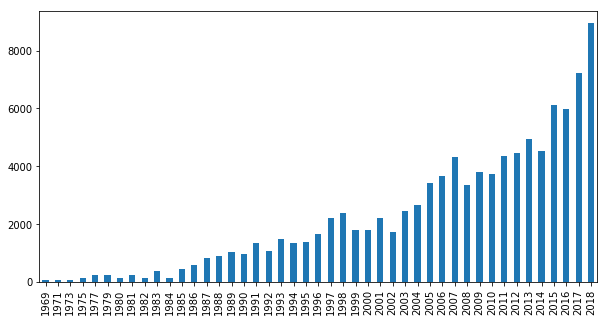

In [0]:
dblp_papers = dblp_papers[dblp_papers['paper year'] != '']
plt.figure(figsize=(10,5))
dblp_papers['paper year'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.show()

***A3.3***

In [0]:
mlconf = ['icml', 'nips']

dblp_ml = dblp_papers[dblp_papers['conference'].isin(mlconf)]
dblp_ml.head()

,paper id,paper authors,paper year,paper title,conference
3882505,conf/nips/FelzenszwalbO14,"['Pedro F. Felzenszwalb', 'John G. Oberlin']",2014,Multiscale Fields of Patterns.,nips
3882506,conf/nips/Davis88,['Lawrence Davis'],1988,Mapping Classifier Systems Into Neural Networks.,nips
3882507,conf/nips/Yuille05,['Alan L. Yuille'],2005,Augmented Rescorla-Wagner and Maximum Likeliho...,nips
3882508,conf/nips/MelRA96,"['Bartlett W. Mel', 'Daniel L. Ruderman', 'Kev...",1996,Complex-Cell Responses Derived from Center-Sur...,nips
3882509,conf/nips/0001OZ12,"['Ping Li 0001', 'Art B. Owen', 'Cun-Hui Zhang']",2012,One Permutation Hashing.,nips


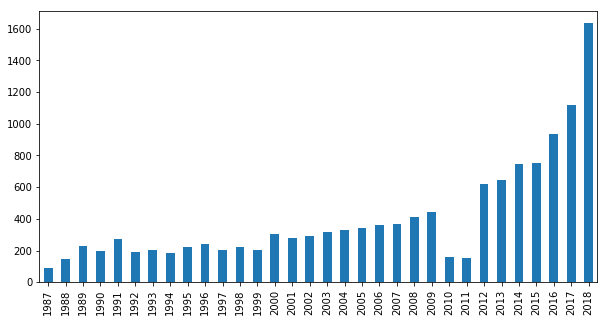

In [0]:
plt.figure(figsize=(10,5))
dblp_ml['paper year'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.show()

In [0]:
dblp_ml.loc[(dblp_ml['paper year'] == '2010') | (dblp_ml['paper year'] == '2011')]['conference'].value_counts()

icml    314
Name: conference, dtype: int64

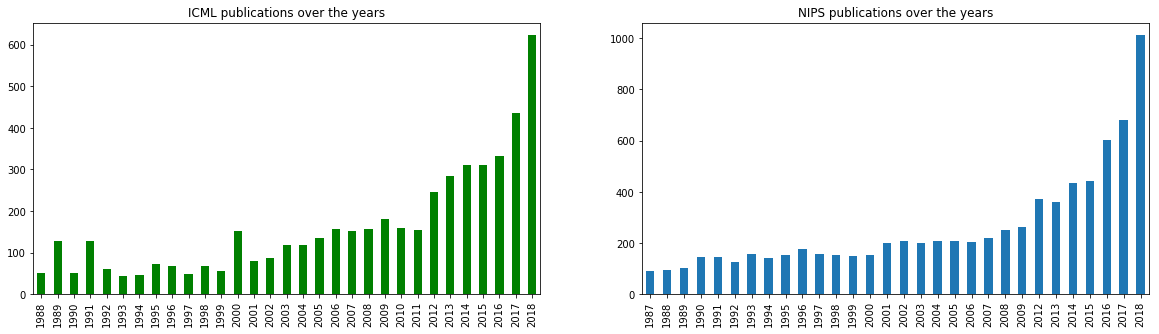

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
dblp_ml[dblp_ml.conference == 'icml']['paper year'].value_counts(sort=False).sort_index().plot(kind='bar',color='g',ax=ax1,title='ICML publications over the years')
dblp_ml[dblp_ml.conference == 'nips']['paper year'].value_counts(sort=False).sort_index().plot(kind='bar',ax=ax2, title='NIPS publications over the years')

plt.show()

We see that there is a problem between the years 2010 and 2011. Indeed, we see a big drop of papers published. This is not normal as it should follow the trend. The problem is that we have no information about the papers published in the NIPS conference between 2010 and 2011.

***A3.4***

In [0]:
import requests
URL = 'https://papers.nips.cc/'

In [0]:
r = requests.get(URL)
page_body = r.text

In [0]:
soup = BeautifulSoup(page_body, 'html.parser')

In [0]:
all_links = soup.find_all('a')
usefull_links = []
for link in all_links:
    if(link.get('href').startswith('/book')):  # Retrieve only the links that lead to the 
        usefull_links.append(link.get('href'))
       

In [0]:
missing_df = pd.DataFrame(columns=['paper id' ,	'paper authors' ,	'paper year', 	'paper title' ,	'conference'])

In [0]:
row_list = []
for link in usefull_links:
  url = URL + link
  year = url.split('-')[-1]
  r = requests.get(url)
  page_body = r.text
  soup = BeautifulSoup(page_body, 'html.parser')
  publications_wrappers = soup.find_all('li')
  print(year)
  for p in publications_wrappers:
    authors = []
    if p.find_all('a', class_='author'):
      title = p.find('a').text
      for author in p.find_all('a', class_='author'):
        authors.append(author.text)
      dict_ = {'paper id' : 'conf' + '/nips/' + authors[0].split(' ')[-1] + year[2:] ,	'paper authors' : authors,	'paper year' : year, 	'paper title':title ,	'conference':'nips'}
      row_list.append(dict_)

2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987


In [0]:
missing_df = missing_df.append(row_list) # DF with all the data in NIPS

In [0]:
missing_df_auth = splitDataFrameList(missing_df,'paper authors',',')

AttributeError: ignored

We already have done some cleaning but we still need to remove some inconsistencies


In [0]:
# Cleaning part

# We first replace the problematic nips data by our clean data
dblp_papers = dblp_papers[dblp_papers['conference'] != 'nips'].append(missing_df)
dblp_authors = dblp_authors[dblp_authors['conference'] != 'nips'].append(missing_df_auth)
dblp_ml = dblp_ml[dblp_ml['conference'] != 'nips'].append(missing_df)

# Then we drop the data that is still missing
dblp_authors = dblp_authors[dblp_authors['paper year'] != '']
dblp_papers = dblp_papers[dblp_papers['paper authors'] != '[]']
dblp_ml = dblp_ml[dblp_ml['paper authors'] != '[]']

Now we redo the previous graphs

A.3.2

In [0]:
plt.figure(figsize=(10,5))
dblp_papers['paper year'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.show()

A.3.3

In [0]:
plt.figure(figsize=(10,5))
dblp_ml['paper year'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.show()

We save the current clean DF

In [0]:
dblp_papers.to_pickle("dblp_papers.pkl")
dblp_authors.to_pickle("dblp_authors.pkl")

In [0]:
dblp_papers = pd.read_pickle("dblp_papers.pkl")
dblp_authors = pd.read_pickle("dblp_authors.pkl")

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [0]:
grouped = dblp_authors.groupby('paper authors')
dict_npc = {}
for i, group in grouped:
  if (int(group['paper year'].max()) - int(group['paper year'].min())):
    activity = int(group['paper year'].max()) - int(group['paper year'].min())
  else:
    activity = int(group['paper year'].max())
  nb_papers = len(group)
  dict_npc[i] = nb_papers/activity

NameError: ignored

In [0]:
import seaborn as sns
ax = sns.distplot(list(dict_npc.values()),kde=False,bins=50)
ax.set_yscale('log')

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [0]:
rk= dblp_authors.groupby(['paper authors'],as_index=False).agg({'paper id': 'count'})
rk=rk.rename(columns={"paper id":"numberofpapers"})
rk=rk.sort_values(by='numberofpapers', ascending= False).reset_index(drop=True)
rk

,paper authors,numberofpapers
0,Sheila A. McIlraith,913
1,Satinder P. Singh (ed.),661
2,Luc Van Gool,216
3,Thomas S. Huang,185
4,Toshio Fukuda,163
5,Michael I. Jordan,162
6,Xiaoou Tang,147
7,Shuicheng Yan,146
8,Takeo Kanade,145
9,Trevor Darrell,142


### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [0]:
aim= pd.read_csv('data/aminer_ai.csv', sep=";")
aim['Short Name']= aim['Short Name'].str.lower()
aim.rename(columns={'Short Name':'conference'}, inplace=True)
aim=aim.iloc[:,[2,3]]

In [0]:
indexed=dblp_authors.set_index('conference').join(aim.set_index('conference'));
indexed

,paper authors,paper id,paper title,paper year,H5-Index
conference,,,,,
aaai,Ofra Amir,conf/aaai/AmirSS15,Multi-Agent Pathfinding as a Combinatorial Auc...,2015,44
aaai,Guni Sharon,conf/aaai/AmirSS15,Multi-Agent Pathfinding as a Combinatorial Auc...,2015,44
aaai,Roni Stern,conf/aaai/AmirSS15,Multi-Agent Pathfinding as a Combinatorial Auc...,2015,44
aaai,Saadat Anwar,conf/aaai/AnwarB14,Pathway Specification and Comparative Queries:...,2014,44
aaai,Chitta Baral,conf/aaai/AnwarB14,Pathway Specification and Comparative Queries:...,2014,44
aaai,Ernest Davis,conf/aaai/Davis88,Inferring Ignorance from the Locality of Visua...,1988,44
aaai,Pranav Anand,conf/aaai/AnandKBWMOR11,Believe Me - We Can Do This! Annotating Persua...,2011,44
aaai,Joseph King,conf/aaai/AnandKBWMOR11,Believe Me - We Can Do This! Annotating Persua...,2011,44
aaai,Jordan L. Boyd-Graber,conf/aaai/AnandKBWMOR11,Believe Me - We Can Do This! Annotating Persua...,2011,44


***B2.2***

In [0]:
grouped = indexed.groupby('paper authors')
rk2=indexed.iloc[:,[2,4]]


In [0]:
rk2= indexed.groupby(['paper authors'],as_index=False).agg({'H5-Index': 'sum'})
rk2=rk2.sort_values(by='H5-Index', ascending= False).reset_index(drop=True)
rk2

,paper authors,H5-Index
0,Sheila A. McIlraith,40076
1,Satinder P. Singh (ed.),29084
2,Luc Van Gool,18355
3,Thomas S. Huang,14042
4,Xiaoou Tang,13019
5,Shuicheng Yan,11660
6,Trevor Darrell,11495
7,Larry S. Davis,11131
8,Marc Pollefeys,10911
9,Martial Hebert,10227


***B2.3***

In [0]:
tprk=rk[:20]
tprk2=rk2[:20]

In [0]:
tprk.equals(tprk2)

False

***B2.4***

In [0]:
''' Add your code here '''

***B2.5***

In [0]:
''' Add your code here '''

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

In [0]:
''' Add your code here '''

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [0]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [0]:
''' Add your code here '''

In [0]:
words_symbolic = ['logic', 'planning', 'control']
''' Add your code here '''

In [0]:
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']
''' Add your code here '''